In [209]:
import sys
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import os
import math

from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import precision_recall_curve, accuracy_score, precision_score, f1_score,mean_squared_error,plot_confusion_matrix,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn import linear_model


from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

import statsmodels.api as sm

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import he_normal

In [159]:
def R_oss(y_test,y_pred):
    
    sum_numerator = 0
    sum_denom = 0
    
        
    for i in range(len(y_pred)):
        sum_numerator += (y_test[i]-y_pred[i])**2
        sum_denom += (y_test[i] - y_test.mean())**2
    R_Oss_GKX = 1 - ((sum_numerator)/(sum(y_test**2)))
    R_Oss = 1 - ((sum_numerator)/(sum_denom))
    
    print("Mean Squared Error is", mean_squared_error(y_test, y_pred))
    print("R_Oos is",R_Oss*100,"%")
    print("R_Oos GKX is",R_Oss_GKX*100,"%")
    
def train_test(X,y,train_start,train_end,test_end):
    
    train = (train_start <= X.index) & (X.index < train_end)
    test = (train_end <= X.index) & (X.index < test_end)

    X_train = X[train]
    y_train = y[train].values.ravel()
    X_test = X[test]
    y_test = y[test].values.ravel()
    
    return X_train,y_train,X_test,y_test

### Predicting stock from News using Decession Trees

In [160]:
def decision_tree_nlp(X,y,train_start,train_end,test_end):
    
    data =train_test(X,y,train_start,train_end,test_end)
   
    clf = tree.DecisionTreeRegressor()
    clf.fit(data[0],data[1])
    y_pred = clf.predict(data[2])

    pred_cum = []
    real_cum = []
    
    for i in range(len(y_pred)):
        pred_cum.append(sum(y_pred[:i])+1)
        real_cum.append(sum(data[3][:i])+1)
    
    R_oss(data[3],y_pred)
    
    plt.figure()
    plt.title('Cummulative returns')
    plt.plot(pred_cum,label = 'Predictions')
    plt.plot(real_cum,label = 'Actual')
    plt.legend()
    plt.show()
    
    return clf

### Predicting stock from News using Random Forest

In [161]:
def random_forest_nlp(X,y,train_start,train_end,test_end):
    
    data =train_test(X,y,train_start,train_end,test_end)

    regr = RandomForestRegressor(max_depth=None, random_state=0)
    regr.fit(data[0],data[1])
    y_pred = regr.predict(data[2]).ravel()

    pred_cum = []
    real_cum = []
    
    for i in range(len(y_pred)):
        pred_cum.append(sum(y_pred[:i])+1)
        real_cum.append(sum(data[3][:i])+1)
    
    R_oss(data[3],y_pred)
    
    plt.figure()
    plt.title('Cummulative returns')
    plt.plot(pred_cum,label = 'Predictions')
    plt.plot(real_cum,label = 'Actual')
    plt.legend()
    plt.show()
    
    return regr

In [223]:
def random_forest_claasifier_nlp(X,y,train_start,train_end,test_end):
    
    data =train_test(X,y,train_start,train_end,test_end)

    clf = RandomForestClassifier(max_depth=2, random_state=0)
    clf.fit(data[0], data[1])
    y_pred = clf.predict(data[2])
    precision = precision_score(data[3], y_pred)
    conf_matrix = confusion_matrix(data[3], y_pred)
    
    print('Precision is: ',precision*100,'%')
    print(conf_matrix)
    return clf

In [162]:

def lasso_nlp(X,y,train_start,train_end,test_end,alpha=0.1):
    data =train_test(X,y,train_start,train_end,test_end)
    
    clf = linear_model.Lasso(alpha)
    clf.fit(data[0],data[1])
    y_pred = clf.predict(data[2])
    
    pred_cum = []
    real_cum = []
    
    for i in range(len(y_pred)):
        pred_cum.append(sum(y_pred[:i])+1)
        real_cum.append(sum(data[3][:i])+1)
    
    R_oss(data[3],y_pred)
    
    plt.figure()
    plt.title('Cummulative returns')
    plt.plot(pred_cum,label = 'Predictions')
    plt.plot(real_cum,label = 'Actual')
    plt.legend()
    plt.show()
    
    return clf
    


### Predicting stock from News using ANN 

In [163]:
def model_1(X,y,x_val,y_val,epochs,lamda,p,learning,b_1,b_2):

    model = Sequential()
    
    model.add(Dense(30, activation='relu',
                    kernel_regularizer=l2(l=lamda), 
                    kernel_initializer=he_normal(),
                    input_dim=X.shape[1])) # number of columns
    model.add(Dropout(p))
   
    model.add(Dense(15, activation='relu',
                    kernel_regularizer=l2(l=lamda),
                    kernel_initializer=he_normal()))
    model.add(Dropout(p))

    model.add(Dense(9, activation='relu',
                    kernel_regularizer=l2(l=lamda),
                    kernel_initializer=he_normal()))
    model.add(Dropout(p))    
    
    model.add(Dense(1, activation='linear',
                    kernel_initializer=he_normal()))

    model.compile(loss='mse',
                  optimizer=Adam(learning_rate=learning, beta_1=b_1, beta_2=b_2),
                  metrics=['mse'])
    
    tf.keras.backend.set_learning_phase(True)
    history = model.fit(X,y,validation_data=(x_val, y_val),
                     epochs=epochs, batch_size=1024,
                     verbose=1)
    tf.keras.backend.set_learning_phase(False)

    return model,history

Mean Squared Error is 0.0006599052472512023
R_Oos is -239.64665600727147 %
R_Oos GKX is -239.49424473498854 %


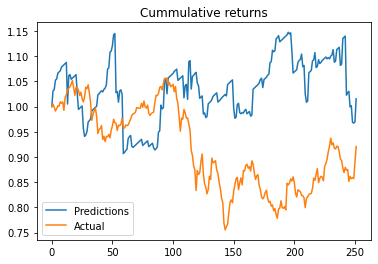

Mean Squared Error is 0.0004545331088681623
R_Oos is -133.94366254053 %
R_Oos GKX is -133.83868387926637 %


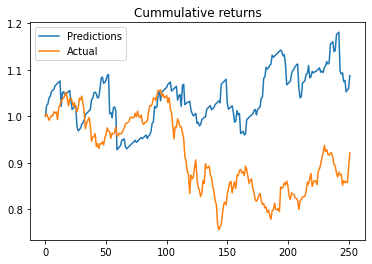

RandomForestRegressor(random_state=0)

In [164]:
Msft_final = pd.read_csv('Benchmark_Msft.csv', delimiter=',')
Msft_final.dataframeName = 'Benchmark_Msft.csv'
Msft_final.set_index('Date',inplace=True)

X_Msft,y_Msft = Msft_final[['compound']],Msft_final[['returns']]

decision_tree_nlp(X_Msft,y_Msft,'2008-12-04','2009-12-04','2010-12-04')
random_forest_nlp(X_Msft,y_Msft,'2008-12-04','2009-12-04','2010-12-04')

Mean Squared Error is 0.0007573825025765708
R_Oos is -149.90852325369355 %
R_Oos GKX is -146.46911888749625 %


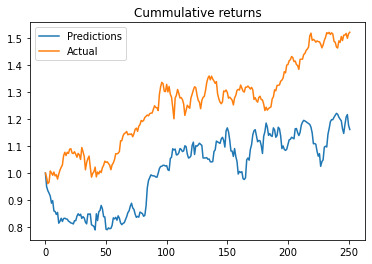

Mean Squared Error is 0.0005143507276410783
R_Oos is -69.71692683941994 %
R_Oos GKX is -67.38117161351065 %


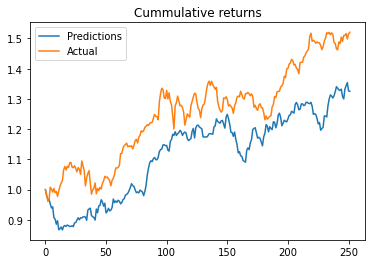

RandomForestRegressor(random_state=0)

In [165]:
Appl_final = pd.read_csv('Benchmark_Apple.csv', delimiter=',')
Appl_final.dataframeName = 'Benchmark_Apple.csv'
Appl_final.set_index('Date',inplace=True)

X_Appl,y_Appl = Appl_final[['compound']],Appl_final[['returns']]

decision_tree_nlp(X_Appl,y_Appl,'2008-12-04','2009-12-04','2010-12-04')
random_forest_nlp(X_Appl,y_Appl,'2008-12-04','2009-12-04','2010-12-04')

Mean Squared Error is 0.00021310418497846845
R_Oos is 29.683413617326416 %
R_Oos GKX is 30.651156418059735 %


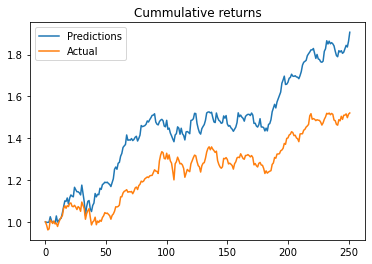

Mean Squared Error is 0.00010664451913422723
R_Oos is 64.81120939648251 %
R_Oos GKX is 65.29550052216004 %


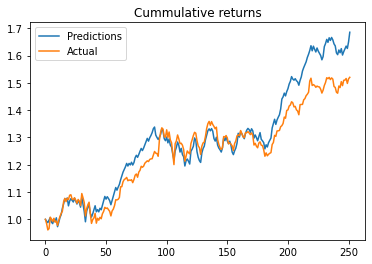

RandomForestRegressor(random_state=0)

In [169]:
Dataset_final = pd.read_csv('Dataset_final.csv')
Dataset_final.dataframeName = 'Dataset_final.csv'
Dataset_final.set_index('Date',inplace=True)
X_App,y_App = Dataset_final.drop(['Apple returns','Top6','Top7','Top8','Top9','Top10','Top11','Top12','Top13','Top14','Top15','Top16','Top17','Top18','Top19','Top20','Top21','Top22','Top23','Top24','Top25'],axis=1),Dataset_final['Apple returns']

decision_tree_nlp(X_App,y_App,'2008-12-04','2009-12-04','2010-12-04')
random_forest_nlp(X_App,y_App,'2008-12-04','2009-12-04','2010-12-04')

Mean Squared Error is 0.00019123741086919834
R_Oos is -51.80677038766341 %
R_Oos GKX is -49.37249557795597 %


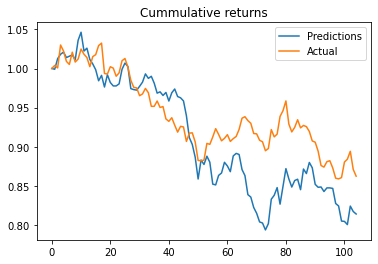

Mean Squared Error is 9.012716052069163e-05
R_Oos is 28.455875340129978 %
R_Oos GKX is 29.603110473301907 %


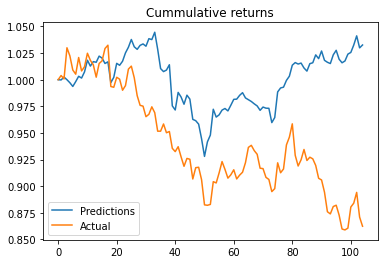

RandomForestRegressor(random_state=0)

In [157]:
X_Ms,y_Ms = Dataset_final.drop(['Microsoft returns','Top6','Top7','Top8','Top9','Top10','Top11','Top12','Top13','Top14','Top15','Top16','Top17','Top18','Top19','Top20','Top21','Top22','Top23','Top24','Top25'],axis=1),Dataset_final['Microsoft returns']

decision_tree_nlp(X_Ms,y_Ms,'2008-08-08','2011-01-04','2011-06-04')
random_forest_nlp(X_Ms,y_Ms,'2008-08-08','2011-01-04','2011-06-04')

In [225]:
X_class_apple = Dataset_final.drop(['Apple Label','Apple returns','Microsoft returns'
                                     ],axis=1)#,'Top6','Top7','Top8','Top9',
                                     #'Top10','Top11','Top12','Top13','Top14','Top15','Top16',
                                     #'Top17','Top18','Top19','Top20','Top21','Top22','Top23','Top24','Top25'],axis=1)

y_class = Dataset_final['Apple Label']

In [228]:
#Stock dropping
random_forest_claasifier_nlp(X_class,y_class,'2010-08-08','2011-01-04','2011-03-04')
#Stock icreasing
random_forest_claasifier_nlp(X_class,y_class,'2008-12-04','2009-12-04','2010-12-04')

Precision is:  68.75 %
[[ 5 10]
 [ 4 22]]
Precision is:  73.41772151898735 %
[[ 68  42]
 [ 26 116]]


RandomForestClassifier(max_depth=2, random_state=0)

In [241]:
X_class_msft = Dataset_final.drop(['Apple Label','Apple returns','Microsoft returns','Microsoft Label',
                                     'Top6','Top7','Top8','Top9',
                                     'Top10','Top11','Top12','Top13','Top14','Top15','Top16',
                                     'Top17','Top18','Top19','Top20','Top21','Top22','Top23','Top24','Top25'],axis=1)

y_class_msft = Dataset_final['Microsoft Label']

In [242]:
random_forest_claasifier_nlp(X_class_msft,y_class_msft,'2010-01-01','2011-01-04','2011-06-04')
random_forest_claasifier_nlp(X_class_msft,y_class_msft,'2008-12-04','2009-12-04','2010-12-04')

Precision is:  66.10169491525424 %
[[37 20]
 [ 9 39]]
Precision is:  65.4639175257732 %
[[ 52  67]
 [  6 127]]


RandomForestClassifier(max_depth=2, random_state=0)